In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
price_and_demand = pd.read_csv("price_and_demand.csv")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8348,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8349,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8350,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [3]:
# Check datatype of the dataframe
price_and_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [4]:
# check if there is any mising data
price_and_demand.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [5]:
# Convert "SETTLEMENTDATE" column to datetime
price_and_demand["SETTLEMENTDATE"] = pd.to_datetime(price_and_demand["SETTLEMENTDATE"], format="%d/%m/%Y %H:%M")

In [6]:
# Extract date from "SETTLEMENTDATE" and create a new 'Date' column
price_and_demand['Date'] = price_and_demand['SETTLEMENTDATE'].dt.date

In [7]:
# Sampling 20 examples
price_and_demand.sample(20)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date
543,VIC1,2022-11-12 08:00:00,3848.05,2.31,TRADE,2022-11-12
7500,VIC1,2023-04-06 06:30:00,4692.99,112.18,TRADE,2023-04-06
7619,VIC1,2023-04-08 18:00:00,4996.21,8.94,TRADE,2023-04-08
5572,VIC1,2023-02-25 02:30:00,4304.85,33.56,TRADE,2023-02-25
7928,VIC1,2023-04-15 04:30:00,3414.64,-49.40,TRADE,2023-04-15
6665,VIC1,2023-03-19 21:00:00,4451.15,73.95,TRADE,2023-03-19
4970,VIC1,2023-02-12 13:30:00,2610.85,-161.52,TRADE,2023-02-12
5685,VIC1,2023-02-27 11:00:00,4814.98,-19.99,TRADE,2023-02-27
1011,VIC1,2022-11-22 02:00:00,3948.36,-38.00,TRADE,2022-11-22
2685,VIC1,2022-12-26 23:00:00,4592.67,90.86,TRADE,2022-12-26


In [8]:
# Calculate maximum daily energy demand and average rrp
max_demand = price_and_demand.groupby("Date")['TOTALDEMAND'].max()
print(type(max_demand))

<class 'pandas.core.series.Series'>


In [9]:
mean_rrp = price_and_demand.groupby("Date")['RRP'].mean().round(2)
mean_rrp

Date
2022-11-01     -3.76
2022-11-02     -2.52
2022-11-03     63.21
2022-11-04    110.94
2022-11-05     72.96
               ...  
2023-04-20    130.71
2023-04-21    131.46
2023-04-22     80.39
2023-04-23     63.21
2023-04-24     63.77
Name: RRP, Length: 175, dtype: float64

In [10]:
# Importing Weather Dataset
weather = pd.read_csv("weather.csv", encoding='latin-1',dayfirst = True)
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [11]:
weather.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am cloud amount (oktas)             float64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: obj

In [12]:
#Removing entirely empty columns
weather = weather.dropna(axis = 1, how = 'all')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [13]:
#Setting Date format to match
weather = weather.copy()
weather["Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")
weather.head()

#Setting Date as the ID Column
weather = weather.set_index('Date')
weather

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [14]:
"""Data Cleaning across entire dataframe"""
#Replacing all occurrences of 'Calm' windspeed with 0 km/h
weather_nocalm = weather.replace("Calm",0)
weather_nocalm

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [15]:
#Replacing all wind directions with True Bearing quantities
weather_bearings = weather_nocalm.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
                                          [0,22.5,45,67.5,90,112.5,135,157.5,180,202.5,225,247.5,270,292.5,315,337.5])
#Renaming Columns with True Bearing Units
weather_bearings.rename(columns = {'Direction of maximum wind gust ':'Direction of maximum wind gust (°T)', '9am wind direction':'9am wind direction (°T)','3pm wind direction':'3pm wind direction (°T)'},inplace = True)

#Data Cleaning Complete
processed_data = weather_bearings

processed_data

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (°T),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (°T),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (°T),3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,225.0,44.0,11:36,12.0,64,315,13,991.3,13.2,59.0,292.5,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,202.5,43.0,11:33,11.0,65,270,9,1006.7,15.1,54.0,202.5,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,202.5,31.0,8:07,11.5,70,202.5,9,1019.2,13.8,67.0,202.5,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,180.0,24.0,14:50,12.3,84,247.5,6,1028.1,16.9,56.0,225.0,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,0.0,31.0,11:58,14.0,78,0,9,1026.3,18.8,65.0,225.0,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,202.5,17.0,12:47,12.4,72,22.5,7,1026.8,17.5,58.0,225.0,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,202.5,13.0,10:48,14.8,78,45,6,1030.5,18.6,64.0,157.5,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,202.5,22.0,16:09,15.2,84,225,6,1031.9,18.8,64.0,202.5,11.0,1029.7


In [16]:
#Selecting key features based on 'expert' insight and desired focus variables
selected_features = ["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)","Speed of maximum wind gust (km/h)","9am relative humidity (%)","3pm relative humidity (%)", "9am wind speed (km/h)","3pm wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]
# selected_features = ["Maximum temperature (°C)", "3pm relative humidity (%)"]
selected_features

selected_data = processed_data[selected_features]

#Checking for missing values across selected features
missing_value = processed_data[selected_features].isnull()
missing_value

#Removing data points with missing selected features
selected_data = processed_data[selected_features].dropna()
predictor_data = processed_data[selected_features].dropna()
predictor_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64,59.0,13,11.0,991.3,991.5
2022-11-02,6.9,15.7,2.8,43.0,65,54.0,9,13.0,1006.7,1008.4
2022-11-03,9.1,15.4,0.4,31.0,70,67.0,9,9.0,1019.2,1021.3
2022-11-04,10.2,17.8,0.2,24.0,84,56.0,6,9.0,1028.1,1026.6
2022-11-05,11.8,22.7,0.0,31.0,78,65.0,9,11.0,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66,53.0,9,9.0,1022.0,1022.1
2023-04-20,7.8,18.5,0.0,17.0,72,58.0,7,4.0,1026.8,1025.5
2023-04-21,11.3,19.0,0.0,13.0,78,64.0,6,2.0,1030.5,1029.2


In [17]:
# Converting all data to float64
selected_data = selected_data.astype(float)
selected_data

predictor_data = predictor_data.astype(float)
predictor_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64.0,59.0,13.0,11.0,991.3,991.5
2022-11-02,6.9,15.7,2.8,43.0,65.0,54.0,9.0,13.0,1006.7,1008.4
2022-11-03,9.1,15.4,0.4,31.0,70.0,67.0,9.0,9.0,1019.2,1021.3
2022-11-04,10.2,17.8,0.2,24.0,84.0,56.0,6.0,9.0,1028.1,1026.6
2022-11-05,11.8,22.7,0.0,31.0,78.0,65.0,9.0,11.0,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66.0,53.0,9.0,9.0,1022.0,1022.1
2023-04-20,7.8,18.5,0.0,17.0,72.0,58.0,7.0,4.0,1026.8,1025.5
2023-04-21,11.3,19.0,0.0,13.0,78.0,64.0,6.0,2.0,1030.5,1029.2


In [18]:
# Introducing Target Variables
selected_data["Average RRP"] = mean_rrp
selected_data["Maximum Energy Demand"] = max_demand
selected_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
Date,,,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64.0,59.0,13.0,11.0,991.3,991.5,-3.76,5627.52
2022-11-02,6.9,15.7,2.8,43.0,65.0,54.0,9.0,13.0,1006.7,1008.4,-2.52,6018.43
2022-11-03,9.1,15.4,0.4,31.0,70.0,67.0,9.0,9.0,1019.2,1021.3,63.21,6004.84
2022-11-04,10.2,17.8,0.2,24.0,84.0,56.0,6.0,9.0,1028.1,1026.6,110.94,5757.62
2022-11-05,11.8,22.7,0.0,31.0,78.0,65.0,9.0,11.0,1026.3,1023.2,72.96,4783.60
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66.0,53.0,9.0,9.0,1022.0,1022.1,102.33,6042.88
2023-04-20,7.8,18.5,0.0,17.0,72.0,58.0,7.0,4.0,1026.8,1025.5,130.71,6084.21
2023-04-21,11.3,19.0,0.0,13.0,78.0,64.0,6.0,2.0,1030.5,1029.2,131.46,5903.60


# KNN & KFOLD - Influence with different intervals.

In [19]:
selected_data.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,14.072414,23.121839,1.786207,34.563218,68.66092,54.298851,9.298851,13.045977,1014.363218,1012.819540,54.621552,5592.053506
std,3.228188,5.419904,4.318081,9.083048,12.42294,15.155163,4.632419,4.246476,7.008131,6.864583,44.188542,739.659403
min,6.900000,13.100000,0.000000,13.000000,32.00000,16.000000,0.000000,2.000000,991.300000,990.300000,-52.470000,4433.750000
25%,11.700000,19.300000,0.000000,28.000000,63.00000,44.000000,7.000000,11.000000,1011.100000,1008.900000,22.970000,5188.285000
50%,14.150000,21.700000,0.000000,33.000000,68.00000,55.500000,9.000000,13.000000,1014.850000,1012.950000,53.920000,5446.465000
75%,16.075000,26.275000,1.400000,41.000000,76.00000,64.750000,13.000000,15.000000,1018.675000,1016.900000,88.197500,5848.355000
max,25.000000,40.500000,38.400000,59.000000,100.00000,97.000000,24.000000,28.000000,1034.400000,1032.400000,229.870000,8850.610000


In [20]:
selected_data["Maximum Energy Demand"].describe()

count     174.000000
mean     5592.053506
std       739.659403
min      4433.750000
25%      5188.285000
50%      5446.465000
75%      5848.355000
max      8850.610000
Name: Maximum Energy Demand, dtype: float64

In [21]:
# mean = 5592.053506
# std = 739.659403
# min = 4433.750000
# 25% = 5188.285000
# 50% = 5446.465000
# 75% = 5848.355000
# max = 8850.610000

# bins1 = min, 25%, 75%, max
# bins2 = min, 25%, mean, max 
# bins3 = min, 25%, 50%, max
# bins4 = min, mean, 75%, max
# bins5 = min, 50%, 75%, max
# bins6 = min, 50%, mean, max
# bins7 = min, 6000, 7000, max

In [22]:
# Feature select: Maximum temperature (°C) & 3pm relative humidity (%)

In [23]:
# Bins1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins1 = ["4433.75", "5188.285", "5592.054", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins1, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN1:{accuracy_score(labels_test, predictions)}")

KNN1:0.5142857142857142


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.4444444444444444, 0.4444444444444444, 0.3333333333333333, 0.4444444444444444, 0.35294117647058826, 0.5294117647058824, 0.35294117647058826, 0.35294117647058826, 0.5294117647058824, 0.6470588235294118]
0.4431372549019608


In [25]:
# Bins2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins2 = ["4433.75", "5188.285", "5446.465", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins2, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN2:{accuracy_score(labels_test, predictions)}")

KNN2:0.5142857142857142


In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.3333333333333333, 0.5555555555555556, 0.4444444444444444, 0.5, 0.4117647058823529, 0.6470588235294118, 0.5882352941176471, 0.29411764705882354, 0.7058823529411765, 0.6470588235294118]
0.5127450980392158


In [27]:
# Bin3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins3 = ["4433.75", "5188.285", "5848.355", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins3, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN3:{accuracy_score(labels_test, predictions)}")

KNN3:0.5428571428571428


In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.4444444444444444, 0.6666666666666666, 0.5, 0.5555555555555556, 0.29411764705882354, 0.7058823529411765, 0.47058823529411764, 0.47058823529411764, 0.5294117647058824, 0.5294117647058824]
0.5166666666666667


In [29]:
# Bins4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins4 = ["4433.75", "5446.465", "5848.355", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins4, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN4:{accuracy_score(labels_test, predictions)}")

KNN4:0.6


In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.5555555555555556, 0.6111111111111112, 0.5555555555555556, 0.7777777777777778, 0.35294117647058826, 0.7647058823529411, 0.35294117647058826, 0.7058823529411765, 0.47058823529411764, 0.5294117647058824]
0.5676470588235294


In [31]:
# Bins5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins5 = ["4433.75", "5446.465", "5592.054", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins5, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN5:{accuracy_score(labels_test, predictions)}")

KNN5:0.6285714285714286


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.6666666666666666, 0.6111111111111112, 0.4444444444444444, 0.7777777777777778, 0.5294117647058824, 0.7647058823529411, 0.5882352941176471, 0.7058823529411765, 0.5882352941176471, 0.7058823529411765]
0.638235294117647


In [33]:
# Bins6
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins6 = ["4433.75", "5592.064", "5848.355", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins6, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN6:{accuracy_score(labels_test, predictions)}")

KNN6:0.6857142857142857


In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.7777777777777778, 0.5555555555555556, 0.7222222222222222, 0.8888888888888888, 0.5882352941176471, 0.8235294117647058, 0.4117647058823529, 0.8235294117647058, 0.6470588235294118, 0.5882352941176471]
0.6826797385620915


In [35]:
# Bins7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.1, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7:{accuracy_score(labels_test, predictions)}")

KNN7:0.8333333333333334


In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
Maxi_Energy_Demand = selected_data["Demand Category"]

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

accuracy_scores=[]

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = Maxi_Energy_Demand[train_index]
    class_test = Maxi_Energy_Demand[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    
    accuracy_scores.append(accuracy_score(class_test, predictions))

print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.8333333333333334, 0.9444444444444444, 0.7222222222222222, 0.9444444444444444, 0.8235294117647058, 0.8823529411764706, 0.8235294117647058, 0.8823529411764706, 0.7647058823529411, 0.6470588235294118]
0.826797385620915


# KNN Curve with diverse intervals

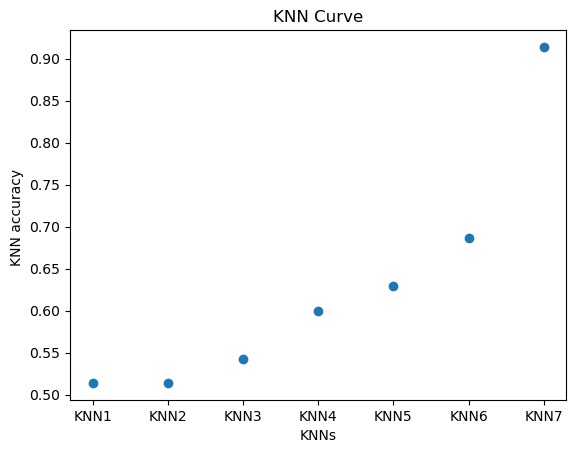

In [37]:
# mean = 5592.053506
# std = 739.659403
# min = 4433.750000
# 25% = 5188.285000
# 50% = 5446.465000
# 75% = 5848.355000
# max = 8850.610000

# bins1 = min, 25%, mean, max
# bins2 = min, 25%, 50%, max
# bins3 = min, 25%, 75%, max
# bins4 = min, 50%, 75%, max
# bins5 = min, 50%, mean, max  
# bins6 = min, mean, 75%, max  
# bins7 = min, 6000, 7000, max 

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(["KNN1", "KNN2", "KNN3", "KNN4", "KNN5", "KNN6", "KNN7"], [0.514, 0.514, 0.543, 0.6, 0.629, 0.686, 0.914])
plt.xlabel("KNNs")
plt.ylabel("KNN accuracy ")
plt.title("KNN Curve")
plt.show()

#### * Based on Above KNN Curve, the best perfoming bining method is KNN7 with 3 bins, and inverval of [min, 6000), [6000,7000), [7000, max].

# KNN Curve with different test size.

In [38]:
# Test size = 0.1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.1, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7_0.1:{accuracy_score(labels_test, predictions)}")

KNN7_0.1:0.8333333333333334


In [39]:
# Test Size = 0.2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7_0.2:{accuracy_score(labels_test, predictions)}")

KNN7_0.2:0.9142857142857143


In [40]:
# Test Size = 0.3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7_0.3:{accuracy_score(labels_test, predictions)}")

KNN7_0.3:0.8679245283018868


In [41]:
# Test Size = 0.4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.4, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7_0.4:{accuracy_score(labels_test, predictions)}")

KNN7_0.4:0.8714285714285714


In [42]:
# Test Size = 0.5

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

bins7 = ["4433.75", "6000", "7000", "8850.62"]  
labels = ['Low Demand', 'Medium Demand', 'High Demand']
selected_data['Demand Category'] = pd.cut(selected_data['Maximum Energy Demand'], bins=bins7, labels=labels, right=False)


features = selected_data[["Maximum temperature (°C)", "3pm relative humidity (%)"]]
labels = selected_data['Demand Category']

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.5, 
                                                                            random_state=1)
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, labels_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(f"KNN7_0.5:{accuracy_score(labels_test, predictions)}")

KNN7_0.5:0.8735632183908046


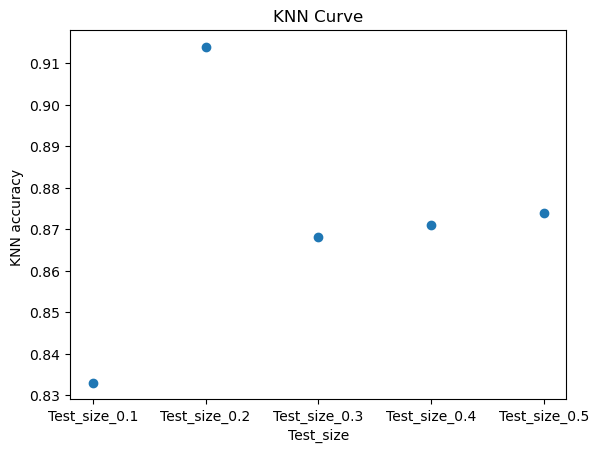

In [43]:
# Test size_1 = 0.1
# Test size_2 = 0.2
# Test size_3 = 0.3
# Test size_4 = 0.4
# Test size_5 = 0.5

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(["Test_size_0.1", "Test_size_0.2", "Test_size_0.3", "Test_size_0.4", "Test_size_0.5"], [0.833, 0.914, 0.868, 0.871, 0.874])
plt.xlabel("Test_size")
plt.ylabel("KNN accuracy ")
plt.title("KNN Curve")
plt.show()

#### * Above plot indicates the optimal train_test split of 80% of train set and 20% of test set.

## Selecting features with Chi2 feature selection method(with ultilised bining and train_test split result)

In [44]:
# Apply optimal energy bining method and insert to dataframe

def bin_energy(x):

    LOWER = 6000
    UPPER = 7000
    
    # [min, 6000)
    if x < LOWER:
        return 0
    # [6000, 7000)
    elif LOWER <= x < UPPER:
        return 1 
    # [7000, max] 
    return 2

# apply the function on the serie
selected_data.insert(loc = 13, column = "Ultimate Energy Bin", value = selected_data["Maximum Energy Demand"].apply(bin_energy))

selected_data

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand,Demand Category,Ultimate Energy Bin
Date,,,,,,,,,,,,,,
2022-11-01,8.5,13.3,3.0,44.0,64.0,59.0,13.0,11.0,991.3,991.5,-3.76,5627.52,Low Demand,0
2022-11-02,6.9,15.7,2.8,43.0,65.0,54.0,9.0,13.0,1006.7,1008.4,-2.52,6018.43,Medium Demand,1
2022-11-03,9.1,15.4,0.4,31.0,70.0,67.0,9.0,9.0,1019.2,1021.3,63.21,6004.84,Medium Demand,1
2022-11-04,10.2,17.8,0.2,24.0,84.0,56.0,6.0,9.0,1028.1,1026.6,110.94,5757.62,Low Demand,0
2022-11-05,11.8,22.7,0.0,31.0,78.0,65.0,9.0,11.0,1026.3,1023.2,72.96,4783.60,Low Demand,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,1.2,28.0,66.0,53.0,9.0,9.0,1022.0,1022.1,102.33,6042.88,Medium Demand,1
2023-04-20,7.8,18.5,0.0,17.0,72.0,58.0,7.0,4.0,1026.8,1025.5,130.71,6084.21,Medium Demand,1
2023-04-21,11.3,19.0,0.0,13.0,78.0,64.0,6.0,2.0,1030.5,1029.2,131.46,5903.60,Low Demand,0


In [45]:
# KNN chi2 feature selection with all variables and target feature with ultimate energy bin

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Extracting features and class labels
features = predictor_data
classlabel = selected_data["Ultimate Energy Bin"]

# Splitting data into train and test sets
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

# Instantiate feature selector
feature_selector = SelectKBest(chi2, k=10)

# Perform selection on the training set
features_train_selected = feature_selector.fit_transform(features_train, class_train)

# Perform selection on the test set
features_test_selected = feature_selector.transform(features_test)

# Display selected features
print("Selected Features:")
display(features_train.columns[feature_selector.get_support()])

# Scaling
scaler = preprocessing.StandardScaler()

# Fit the scaler on the selected training features
scaler.fit(features_train_selected)

# Transform the training and test features using the fitted scaler
features_train_scaled = scaler.transform(features_train_selected)
features_test_scaled = scaler.transform(features_test_selected)

# Fit KNN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train_scaled, class_train)

# Make predictions
predictions = knn.predict(features_test_scaled)

# Print accuracy score
accuracy = accuracy_score(class_test, predictions)
print("Accuracy Score:", accuracy)

# Dictionary to store k values and corresponding accuracy scores
accuracy_dict = {}

# Adjust k value in feature_selector to output all k values and corresponding accuracy scores
k_values = range(1, 11)
for k in k_values:
    feature_selector = SelectKBest(chi2, k=k)
    features_train_selected = feature_selector.fit_transform(features_train, class_train)
    features_test_selected = feature_selector.transform(features_test)
    
    # Fit the scaler on the selected training features
    scaler.fit(features_train_selected)

    # Transform the training and test features using the fitted scaler
    features_train_scaled = scaler.transform(features_train_selected)
    features_test_scaled = scaler.transform(features_test_selected)
    
    knn.fit(features_train_scaled, class_train)
    predictions = knn.predict(features_test_scaled)
    # Calculate and store accuracy score in the dictionary
    accuracy_dict[k] = accuracy_score(class_test, predictions)

# Print the dictionary containing k values and accuracy scores
print("\nAccuracy Scores for Different k Values:")
print(accuracy_dict)

Selected Features:


Index(['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Speed of maximum wind gust (km/h)', '9am relative humidity (%)',
       '3pm relative humidity (%)', '9am wind speed (km/h)',
       '3pm wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm MSL pressure (hPa)'],
      dtype='object')

Accuracy Score: 0.8571428571428571

Accuracy Scores for Different k Values:
{1: 0.8571428571428571, 2: 0.8571428571428571, 3: 0.8571428571428571, 4: 0.8285714285714286, 5: 0.8285714285714286, 6: 0.8285714285714286, 7: 0.8571428571428571, 8: 0.8571428571428571, 9: 0.8285714285714286, 10: 0.8571428571428571}


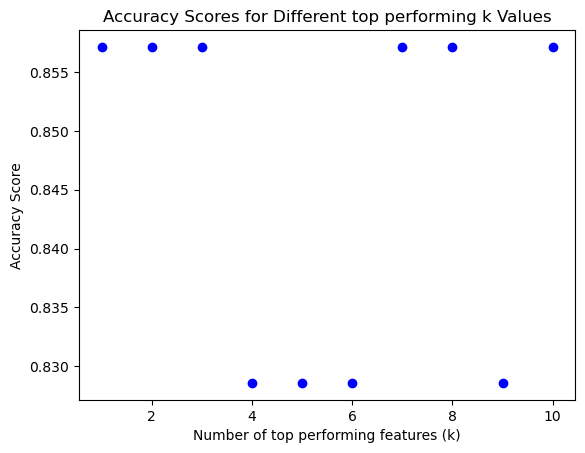

In [46]:
# Plot accuracy score of each feature against the number of top performing feature selected

plt.scatter(accuracy_dict.keys(),accuracy_dict.values(), color = 'blue')
plt.title('Accuracy Scores for Different top performing k Values')
plt.xlabel('Number of top performing features (k)')
plt.ylabel('Accuracy Score')
plt.show()

In [47]:
# KNN chi2 feature selection -- k=7

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, mutual_info_regression

features = predictor_data
classlabel = selected_data["Ultimate Energy Bin"]

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)
display(features_train.head())

# Instantiate
feature_selector = SelectKBest(chi2, k=7)
# Perform selection
features_train = feature_selector.fit_transform(features_train, class_train)
features_test = feature_selector.transform(features_test)
display(features_train)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2023-02-27,16.3,20.2,2.6,33.0,77.0,72.0,13.0,11.0,1015.4,1015.9
2023-03-23,15.3,22.6,10.2,24.0,100.0,68.0,9.0,9.0,1017.6,1015.6
2023-04-13,11.2,22.8,4.4,28.0,89.0,52.0,4.0,11.0,1015.7,1015.2
2022-12-09,9.9,17.6,2.4,41.0,44.0,51.0,15.0,17.0,1018.1,1017.3
2023-03-20,14.9,20.8,0.0,41.0,56.0,42.0,17.0,15.0,1027.8,1026.5


array([[ 20.2,   2.6,  33. ,  77. ,  72. ,  13. ,  11. ],
       [ 22.6,  10.2,  24. , 100. ,  68. ,   9. ,   9. ],
       [ 22.8,   4.4,  28. ,  89. ,  52. ,   4. ,  11. ],
       [ 17.6,   2.4,  41. ,  44. ,  51. ,  15. ,  17. ],
       [ 20.8,   0. ,  41. ,  56. ,  42. ,  17. ,  15. ],
       [ 20.9,   0. ,  37. ,  55. ,  55. ,  13. ,  15. ],
       [ 30.2,   0. ,  28. ,  66. ,  34. ,   9. ,  11. ],
       [ 20.9,   8. ,  24. ,  95. ,  69. ,   0. ,  11. ],
       [ 15.4,   0.4,  31. ,  70. ,  67. ,   9. ,   9. ],
       [ 20.4,   0. ,  37. ,  64. ,  60. ,  11. ,  15. ],
       [ 15.2,  14.8,  35. ,  70. ,  64. ,  15. ,  13. ],
       [ 18.5,   5.8,  43. ,  91. ,  60. ,   7. ,  17. ],
       [ 20.6,   0. ,  35. ,  72. ,  58. ,  13. ,  15. ],
       [ 40.5,   0. ,  46. ,  33. ,  16. ,  19. ,  22. ],
       [ 20.5,   0.2,  37. ,  71. ,  51. ,   9. ,   9. ],
       [ 19.4,   0. ,  33. ,  71. ,  67. ,   6. ,  13. ],
       [ 21.7,   0. ,  33. ,  71. ,  63. ,   9. ,  13. ],
       [ 32.3,

0.8571428571428571


In [48]:
# Using K-fold to cross-validate the performance of selected 7 predictors

from sklearn.model_selection import KFold


features = selected_data[["Maximum temperature (°C)","Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am relative humidity (%)", "3pm relative humidity (%)", "9am wind speed (km/h)", "3pm wind speed (km/h)" ]]
classlabel = selected_data["Ultimate Energy Bin"]


k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    accuracy_scores.append(accuracy_score(class_test, predictions))
    
print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.7777777777777778, 0.8888888888888888, 0.8333333333333334, 0.7777777777777778, 0.8823529411764706, 0.6470588235294118, 0.8235294117647058, 0.7647058823529411, 0.8823529411764706, 0.7647058823529411]
0.8042483660130717


In [49]:
# KNN feature selection -- k=3

# ML workflow WITH filter-based FS
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, mutual_info_regression


#display(selected_data.head())

features = predictor_data
classlabel = selected_data["Ultimate Energy Bin"]

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)
display(features_train.head())

# Instantiate
feature_selector = SelectKBest(chi2, k=3)
# Perform selection
features_train = feature_selector.fit_transform(features_train, class_train)
features_test = feature_selector.transform(features_test)
display(features_train)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am relative humidity (%),3pm relative humidity (%),9am wind speed (km/h),3pm wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,,
2023-02-27,16.3,20.2,2.6,33.0,77.0,72.0,13.0,11.0,1015.4,1015.9
2023-03-23,15.3,22.6,10.2,24.0,100.0,68.0,9.0,9.0,1017.6,1015.6
2023-04-13,11.2,22.8,4.4,28.0,89.0,52.0,4.0,11.0,1015.7,1015.2
2022-12-09,9.9,17.6,2.4,41.0,44.0,51.0,15.0,17.0,1018.1,1017.3
2023-03-20,14.9,20.8,0.0,41.0,56.0,42.0,17.0,15.0,1027.8,1026.5


array([[20.2,  2.6, 72. ],
       [22.6, 10.2, 68. ],
       [22.8,  4.4, 52. ],
       [17.6,  2.4, 51. ],
       [20.8,  0. , 42. ],
       [20.9,  0. , 55. ],
       [30.2,  0. , 34. ],
       [20.9,  8. , 69. ],
       [15.4,  0.4, 67. ],
       [20.4,  0. , 60. ],
       [15.2, 14.8, 64. ],
       [18.5,  5.8, 60. ],
       [20.6,  0. , 58. ],
       [40.5,  0. , 16. ],
       [20.5,  0.2, 51. ],
       [19.4,  0. , 67. ],
       [21.7,  0. , 63. ],
       [32.3,  0. , 30. ],
       [26.2,  0. , 75. ],
       [19.3,  0.2, 62. ],
       [30. ,  1.8, 50. ],
       [17.7,  0.6, 77. ],
       [21.6,  1.4, 55. ],
       [19.8,  1.2, 59. ],
       [31.9,  0. , 28. ],
       [20.7,  2. , 57. ],
       [19.3,  0. , 66. ],
       [20.9,  0. , 60. ],
       [27. ,  0. , 50. ],
       [25.9,  0. , 66. ],
       [18.8,  0.2, 46. ],
       [23.4,  0. , 70. ],
       [22.7,  0. , 65. ],
       [31. ,  0. , 42. ],
       [21.3,  0.2, 39. ],
       [21.1,  3.2, 61. ],
       [21.2,  0. , 69. ],
 

0.8571428571428571


In [50]:
# Using K-fold to cross-validate the performance of selected 3 predictors

from sklearn.model_selection import KFold


features = selected_data[["Maximum temperature (°C)","Rainfall (mm)", "3pm relative humidity (%)"]]
classlabel = selected_data["Ultimate Energy Bin"]


k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    accuracy_scores.append(accuracy_score(class_test, predictions))
    
print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.7777777777777778, 0.9444444444444444, 0.8333333333333334, 0.7222222222222222, 0.9411764705882353, 0.8823529411764706, 0.8823529411764706, 0.7647058823529411, 0.8823529411764706, 0.8235294117647058]
0.8454248366013072
